# [keras](https://keras.io)の紹介

*170615 Masahiro Rikiso*

---

学習リソース：

* [keras実装例](https://github.com/fchollet/keras/tree/master/examples)
* [keras実装例 特にCNN系](https://github.com/fchollet/deep-learning-models)
* [割と人気のあるkeras-jupyter tutorial](https://github.com/leriomaggio/deep-learning-keras-tensorflow)

In [1]:
from __future__ import print_function, division

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
RUN_ID = 'mlp'

## 1. データの読み込み

## 2. 学習用データの作成

In [5]:
def load_mnist_1D(categorical=True):
    '''
    load 1D mnist dataset w/ normalization + one-hot encoding
    '''
    from keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(-1,784)
    X_train = X_train.astype('float32')/255.
    X_test = X_test.reshape(-1,784)
    X_test = X_test.astype('float32')/255.

    if categorical == True:
        from keras.utils import np_utils
        y_train = np_utils.to_categorical(y_train, 10)
        y_test = np_utils.to_categorical(y_test, 10)

    return (X_train, y_train), (X_test, y_test)

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist_1D()

## 3. 機械学習モデルの作成

3層ニューラルネットを定義します。

Input(784) -- FC(256, ReLU) -- FC(256, ReLU) -- Output(10, Softmax)

In [7]:
def save_model_viz(run_id, model):
    '''
    save log_history + model_figure to 'model/'
    '''
    import os
    if not os.path.exists('model/'):
        os.makedirs('model/')

    from keras.utils import plot_model
    plot_model(model, to_file='model/'+run_id+'_vis.png',
               show_shapes=True, show_layer_names=True)

In [8]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

save_model_viz(RUN_ID, model)

hist = model.fit(x_train, y_train, epochs=5, batch_size=32,
                 verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s - loss: 0.1971 - acc: 0.9405 - val_loss: 0.1029 - val_acc: 0.9673
Epoch 2/5
60000/60000 [==============================] - 8s - loss: 0.0823 - acc: 0.9744 - val_loss: 0.0804 - val_acc: 0.9740
Epoch 3/5
60000/60000 [==============================] - 8s - loss: 0.0564 - acc: 0.9819 - val_loss: 0.0726 - val_acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 8s - loss: 0.0440 - acc: 0.9855 - val_loss: 0.0817 - val_acc: 0.9775
Epoch 5/5
60000/60000 [==============================] - 8s - loss: 0.0333 - acc: 0.9891 - val_loss: 0.0806 - val_acc: 0.9770


In [9]:
def save_weights(run_id, model):
    '''
    save learned weights to 'model/'
    '''
    import os
    if not os.path.exists('model/'):
        os.makedirs('model/')

    open('model/'+run_id+'.yaml', 'w').write(model.to_yaml())
    model.save_weights('model/'+run_id+'_weight.h5')


def save_hist(run_id, history):
    '''
    save log_history to 'log/'
    '''
    import os
    if not os.path.exists('log/'):
        os.makedirs('log/')

    import pandas as pd
    df = pd.DataFrame(history.history)
    df.to_csv('log/'+run_id+'_history.csv', index=False)


def plot_hist(run_id, val=True):
    '''
    plot trainig history
    '''
    import pandas as pd
    df = pd.read_csv('log/'+run_id+'_history.csv')

    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(df['acc'],'o-',label='accuracy')
    if val==True:
        plt.plot(df['val_acc'],'o-',label='val_acc')
    plt.title(run_id)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.ylim(min(df['acc'])*0.8, 1.)
    plt.legend(loc='lower right')
    fig.savefig('log/'+run_id+'_acc.png')

    fig = plt.figure()
    plt.plot(df['loss'],'o-',label='loss',)
    if val==True:
        plt.plot(df['val_loss'],'o-',label='val_loss')
    plt.title(run_id)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim(0, max(df['loss'])*1.2)
    plt.legend(loc='upper right')
    fig.savefig('log/'+run_id+'_loss.png')

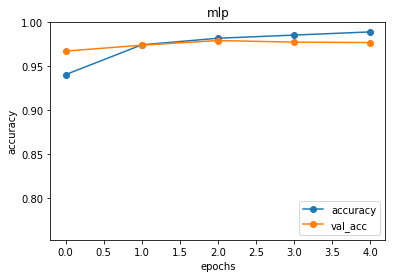

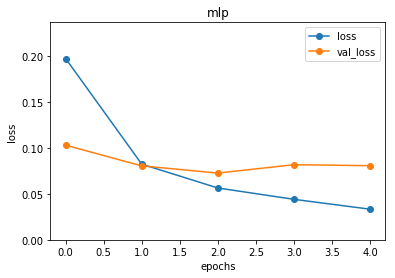

In [10]:
save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)
plot_hist(RUN_ID)

In [12]:
ls

170613_sklearn-tutorial.ipynb     README.md
170614_tensorflow-tutorial.ipynb  log/
170615_keras-tutorial.ipynb       model/
MNIST_data/


In [13]:
from IPython.display import Image

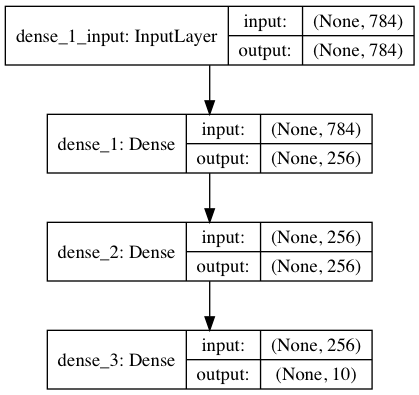

In [14]:
Image("model/mlp_vis.png")